In [34]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from gtda.time_series import TakensEmbedding
import gudhi
from ripser import ripser

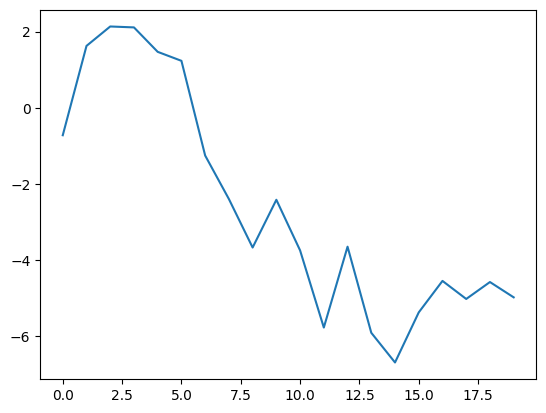

In [29]:
# generate the time series
np.random.seed(4566)
time_series = np.cumsum(np.random.normal(loc=0, scale=1, size=20))
plt.plot(time_series)

In [30]:
te = TakensEmbedding(time_delay=1, dimension=5)
embedded_series = te.fit_transform([time_series])[0]
embedded_series

array([[-0.72219657,  1.62602568,  2.13659113,  2.11219344,  1.46982544],
       [ 1.62602568,  2.13659113,  2.11219344,  1.46982544,  1.23364145],
       [ 2.13659113,  2.11219344,  1.46982544,  1.23364145, -1.25533763],
       [ 2.11219344,  1.46982544,  1.23364145, -1.25533763, -2.39845685],
       [ 1.46982544,  1.23364145, -1.25533763, -2.39845685, -3.67340186],
       [ 1.23364145, -1.25533763, -2.39845685, -3.67340186, -2.41827455],
       [-1.25533763, -2.39845685, -3.67340186, -2.41827455, -3.74909634],
       [-2.39845685, -3.67340186, -2.41827455, -3.74909634, -5.77660551],
       [-3.67340186, -2.41827455, -3.74909634, -5.77660551, -3.651481  ],
       [-2.41827455, -3.74909634, -5.77660551, -3.651481  , -5.91417054],
       [-3.74909634, -5.77660551, -3.651481  , -5.91417054, -6.69479512],
       [-5.77660551, -3.651481  , -5.91417054, -6.69479512, -5.37823055],
       [-3.651481  , -5.91417054, -6.69479512, -5.37823055, -4.55089868],
       [-5.91417054, -6.69479512, -5.3

In [31]:
rips_complex = gudhi.RipsComplex(points=embedded_series, max_edge_length=3.3)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
separate_complex = [[] for _ in range(4)]

for simplex, _ in simplex_tree.get_filtration():
    separate_complex[len(simplex) - 1].append(simplex)

separate_complex

[[[0],
  [1],
  [2],
  [3],
  [4],
  [5],
  [6],
  [7],
  [8],
  [9],
  [10],
  [11],
  [12],
  [13],
  [14],
  [15]],
 [[14, 15],
  [13, 14],
  [13, 15],
  [0, 1],
  [11, 15],
  [1, 2],
  [2, 3],
  [12, 13],
  [12, 15],
  [11, 14],
  [3, 4],
  [6, 7],
  [10, 15],
  [4, 5]],
 [[13, 14, 15], [12, 13, 15], [11, 14, 15]],
 []]

In [37]:
result = ripser(embedded_series, maxdim=3)
diagrams = result["dgms"]
diagrams

[array([[0.        , 1.73286211],
        [0.        , 1.85752189],
        [0.        , 2.49876761],
        [0.        , 2.52673054],
        [0.        , 2.63148403],
        [0.        , 2.8232522 ],
        [0.        , 2.893466  ],
        [0.        , 3.09768343],
        [0.        , 3.22326398],
        [0.        , 3.27936721],
        [0.        , 3.27999258],
        [0.        , 3.36347461],
        [0.        , 3.42039728],
        [0.        , 3.50520802],
        [0.        , 3.53180623],
        [0.        ,        inf]]),
 array([[3.68766379, 4.13438559],
        [3.64679432, 4.01586533]]),
 array([], shape=(0, 2), dtype=float64),
 array([], shape=(0, 2), dtype=float64)]

In [45]:
pd.DataFrame(np.arange(3))

,0
0,0
1,1
2,2
